In [8]:
import os
import cv2
import numpy as np


# Read the image
image = cv2.imread("/home/shravani_k/SEM6/DS-203/Project/E7-images/0001.jpg")

print (np.min(image))

57


In [1]:
from skimage import io
import numpy as np

# Load an image file
image = io.imread("/home/shravani_k/SEM6/DS-203/Project/E7-images/1168.jpg")

# Display image information
print("Image shape:", image.shape)

# Display pixel values
print("Pixel values:")
print(np.min(image))


Image shape: (480, 640, 3)
Pixel values:
55


all_contour_features [[2.23600000e+03 7.69312231e-01 7.65202500e+04 ... 0.00000000e+00
  6.40000000e+02 4.80000000e+02]
 [2.23600000e+03 7.69312231e-01 7.65202500e+04 ... 0.00000000e+00
  6.40000000e+02 4.80000000e+02]
 [2.23600000e+03 7.69312231e-01 7.65202500e+04 ... 0.00000000e+00
  6.40000000e+02 4.80000000e+02]
 ...
 [2.23600000e+03 7.69312231e-01 7.65202500e+04 ... 0.00000000e+00
  6.40000000e+02 4.80000000e+02]
 [2.23600000e+03 7.69312231e-01 7.65202500e+04 ... 0.00000000e+00
  6.40000000e+02 4.80000000e+02]
 [2.23600000e+03 7.69312231e-01 7.65202500e+04 ... 0.00000000e+00
  6.40000000e+02 4.80000000e+02]]


/home/shravani_k/.local/lib/python3.10/site-packages/sklearn/base.py:1351: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/shravani_k/.local/lib/python3.10/site-packages/sklearn/base.py:1351: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/shravani_k/.local/lib/python3.10/site-packages/sklearn/base.py:1351: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/shravani_k/.local/lib/python3.10/site-packages/sklearn/base.py:1351: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/hom

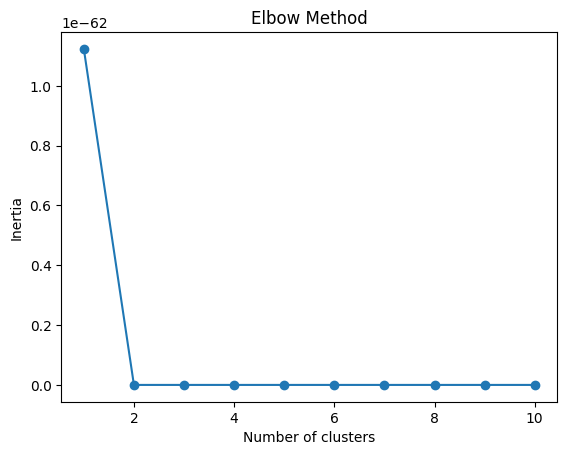

Cluster Labels:
[1 1 1 ... 1 1 1]
1


In [2]:
import os
import cv2
import numpy as np
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

# Set the path to the directory containing the images
images_dir = '/home/shravani_k/SEM6/DS-203/Project/E7-images'

# Function to extract contour-based features
def extract_contour_features(image):
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Convert image to binary
    _, thresh = cv2.threshold(gray_image, 200, 255, cv2.THRESH_BINARY)
    
    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Convert image to binary (assuming shapes are in white)
    #_, thresh = cv2.threshold(image, 200, 255, cv2.THRESH_BINARY)
    
    # Find contours
    #contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    contour_features = []
    for contour in contours:
        # Calculate the tight-fitting bounding box
        x, y, w, h = cv2.boundingRect(contour)
        
        # Contour features
        perimeter = cv2.arcLength(contour, True)
        area = cv2.contourArea(contour)
        circularity = (4 * np.pi * area) / (perimeter ** 2)
        solidity = area / cv2.convexHull(contour, returnPoints=False).shape[0]
        convexity = perimeter / (cv2.arcLength(cv2.convexHull(contour), True))
        compactness = (perimeter ** 2) / area
        
        # Shape descriptor (Hu moments)
        moments = cv2.moments(contour)
        hu_moments = cv2.HuMoments(moments).flatten()
        
        # Length and breadth of the bounding box
        length = w
        breadth = h
        
        # Append features to list
        contour_features.append([
            perimeter, circularity, solidity, convexity, compactness, *hu_moments, length, breadth
        ])
    
    return np.array(contour_features)

# Function to load images from directory
def load_images_from_directory(directory):
    images = []
    for filename in os.listdir(directory):
        if filename.endswith('.jpg') or filename.endswith('.png'):  # Adjust file extensions as needed
            filepath = os.path.join(directory, filename)
            image = cv2.imread(filepath, cv2.IMREAD_UNCHANGED)
            if image is not None:
                images.append(image)
    return images

# Load images from directory
images = load_images_from_directory(images_dir)
#print(np.min(images[1180]))
# Extract contour-based features for all images
all_contour_features = []
for image in images:
    contour_features = extract_contour_features(image)
    all_contour_features.extend(contour_features)

all_contour_features = np.array(all_contour_features)
print("all_contour_features", all_contour_features)

# Determine the optimal number of clusters using the elbow method
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(all_contour_features)
    inertias.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Based on the elbow method, choose the optimal number of clusters
num_clusters = 20 # Adjust as needed

# Perform hierarchical clustering
linkage_matrix = linkage(all_contour_features, method='ward')

# Get cluster labels for each point
cluster_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Print cluster labels for each point
print("Cluster Labels:")
print(cluster_labels)
print(np.min(cluster_labels))

In [3]:
import cv2
import numpy as np

def extract_contour_features(images):
    contour_features_list = []
    
    for image_idx, image in enumerate(images):
        # Convert image to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        print("gray", np.min(gray_image))
        
        # Threshold the image
        _, thresh = cv2.threshold(gray_image, 200, 255, cv2.THRESH_BINARY)
        print("thresh", np.min(thresh))
        
        # Find contours
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        # Calculate minimum pixel value
        min_pixel_value = np.min(gray_image)
        
        # Extract pixel value at (240, 160) in the thresholded image
        pixel_value_thresh = thresh[240, 160]
        
        # Extract features for each contour
        for contour_idx, contour in enumerate(contours):
            # Calculate contour features
            area = cv2.contourArea(contour)
            perimeter = cv2.arcLength(contour, True)
            # Add more features as needed
            
            # Append features to list
            contour_features_list.append([image_idx, contour_idx, area, perimeter, min_pixel_value, pixel_value_thresh])
            
            # Print feature values for the current contour
            print(f"Image {image_idx}, Contour {contour_idx}: Area = {area}, Perimeter = {perimeter}, Min Pixel Value = {min_pixel_value}, Pixel Value at (240, 160) = {pixel_value_thresh}")
    
    # Convert the list of features into a numpy array
    contour_features_array = np.array(contour_features_list)
    
    return contour_features_array


In [4]:
# Set the path to the directory containing the images
images_dir = '/home/shravani_k/SEM6/DS-203/Project/E7-images'

def within_bounds(image, x, y):
    return 0 <= x < image.shape[1] and 0 <= y < image.shape[0]

# Function to load images from directory
def load_images_from_directory(directory):
    images = []
    for filename in os.listdir(directory):
        if filename.endswith('.jpg') or filename.endswith('.png'):  # Adjust file extensions as needed
            filepath = os.path.join(directory, filename)
            image = cv2.imread(filepath, cv2.IMREAD_UNCHANGED)
            if image is not None:
                images.append(image)
    return images

def calculate_area_perimeter(image, target_color):
    # Initialize area count and perimeter count for this image
    area_count = 0
    perimeter_count = 0
    
    # Iterate through each pixel
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # Check if the pixel matches the target color
            if np.array_equal(image[i, j], target_color):
                # Increment area count if the pixel matches
                area_count += 1
                
                # Check neighboring pixels to compute perimeter
                for dx, dy in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
                    nx, ny = i + dx, j + dy
                    if not within_bounds(image, nx, ny) or not np.array_equal(image[nx, ny], target_color):
                        # Increment perimeter count if the neighboring pixel is not of the specified color
                        perimeter_count += 1
    
    return area_count, perimeter_count

def extract_contour_features(images):
    contour_features_list = []
    
    for image_idx, image in enumerate(images):
        # Convert image to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        # Threshold the image
        _, thresh = cv2.threshold(gray_image, 200, 255, cv2.THRESH_BINARY)
        
        # Calculate minimum pixel value
        min_pixel_value = np.min(gray_image)
        
        # Extract pixel value at (240, 160) in the thresholded image
        pixel_value_thresh = thresh[240, 160]
        
        # Calculate area and perimeter using the second code
        target_color = np.array([0, 0, 0])  # Assuming black color for area and perimeter calculation
        area, perimeter = calculate_area_perimeter(thresh, target_color)
        
        # Find contours
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        # Extract features for each contour
        for contour_idx, contour in enumerate(contours):
            # Append features to list
            contour_features_list.append([image_idx, contour_idx, area, perimeter, min_pixel_value, pixel_value_thresh])
            
            # Print feature values for the current contour
            print(f"Image {image_idx}, Contour {contour_idx}: Area = {area}, Perimeter = {perimeter}, Min Pixel Value = {min_pixel_value}, Pixel Value at (240, 160) = {pixel_value_thresh}")
    
    # Convert the list of features into a numpy array
    contour_features_array = np.array(contour_features_list)
    
    return contour_features_array


In [5]:
# Load images from directory
images = load_images_from_directory(images_dir)

# Extract contour features from images
contour_features = extract_contour_features(images)
#print(np.min(contour_features))


Image 0, Contour 0: Area = 0, Perimeter = 0, Min Pixel Value = 188, Pixel Value at (240, 160) = 0
Image 1, Contour 0: Area = 0, Perimeter = 0, Min Pixel Value = 191, Pixel Value at (240, 160) = 0
Image 2, Contour 0: Area = 0, Perimeter = 0, Min Pixel Value = 189, Pixel Value at (240, 160) = 0
Image 3, Contour 0: Area = 0, Perimeter = 0, Min Pixel Value = 187, Pixel Value at (240, 160) = 0
Image 4, Contour 0: Area = 0, Perimeter = 0, Min Pixel Value = 188, Pixel Value at (240, 160) = 0
Image 5, Contour 0: Area = 0, Perimeter = 0, Min Pixel Value = 188, Pixel Value at (240, 160) = 0
Image 6, Contour 0: Area = 0, Perimeter = 0, Min Pixel Value = 188, Pixel Value at (240, 160) = 0


KeyboardInterrupt: 

In [19]:
import cv2
import numpy as np
import os

# Define the directory containing the images
directory =  '/home/shravani_k/SEM6/DS-203/Project/E7-images'
# Define the color you want to calculate the area and perimeter for
target_color = np.array([64, 186, 255])

# Define a function to check if a pixel is within the image boundaries
def within_bounds(image, x, y):
    return 0 <= x < image.shape[1] and 0 <= y < image.shape[0]

# Iterate over each image file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Read the image
        image_path = os.path.join(directory, filename)
        image = cv2.imread(image_path)
        
        # Downsample the image by a factor of 8
        downsampled_image = cv2.resize(image, (image.shape[1] // 8, image.shape[0] // 8))
        
        # Initialize area count and perimeter count for this image
        area_count = 0
        perimeter_count = 0
        
        # Iterate through each pixel
        for i in range(downsampled_image.shape[0]):
            for j in range(downsampled_image.shape[1]):
                # Check if the pixel matches the target color
                if np.array_equal(downsampled_image[i, j], target_color):
                    # Increment area count if the pixel matches
                    area_count += 1
                    
                    # Check neighboring pixels to compute perimeter
                    for dx, dy in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
                        nx, ny = i + dx, j + dy
                        if not within_bounds(downsampled_image, nx, ny) or not np.array_equal(downsampled_image[nx, ny], target_color):
                            # Increment perimeter count if the neighboring pixel is not of the specified color
                            perimeter_count += 1
                            
        # Print the area and perimeter count for this image
        print("Image: {}".format(filename))
        print("Area of region with color {}: {}".format(target_color, area_count))
        print("Perimeter of region with color {}: {}".format(target_color, perimeter_count))
        print()


Image: 0447.jpg
Area of region with color [ 64 186 255]: 2153
Perimeter of region with color [ 64 186 255]: 1340

Image: 0848.jpg
Area of region with color [ 64 186 255]: 2144
Perimeter of region with color [ 64 186 255]: 1492

Image: 0672.jpg
Area of region with color [ 64 186 255]: 2194
Perimeter of region with color [ 64 186 255]: 1539

Image: 0455.jpg
Area of region with color [ 64 186 255]: 1360
Perimeter of region with color [ 64 186 255]: 1366

Image: 0281.jpg
Area of region with color [ 64 186 255]: 1528
Perimeter of region with color [ 64 186 255]: 528

Image: 0886.jpg
Area of region with color [ 64 186 255]: 1545
Perimeter of region with color [ 64 186 255]: 520

Image: 0830.jpg
Area of region with color [ 64 186 255]: 1623
Perimeter of region with color [ 64 186 255]: 637

Image: 0608.jpg
Area of region with color [ 64 186 255]: 1269
Perimeter of region with color [ 64 186 255]: 426

Image: 0015.jpg
Area of region with color [ 64 186 255]: 1252
Perimeter of region with color

KeyboardInterrupt: 

In [7]:
# Define the directory containing the images
image_dir = '/home/shravani_k/SEM6/DS-203/Project/E7-images'
# List all files in the directory
image_files = os.listdir(image_dir)

# Function to calculate area, perimeter, circularity ratio, equivalent diameter, and shape descriptors
def calculate_shape_features(image, target_color):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Threshold to create a mask of pixels matching the target color
    mask = np.all(image == target_color, axis=2)
    
    # Find contours from the mask
    contours, _ = cv2.findContours(mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Initialize area, perimeter, circularity ratio, and equivalent diameter
    area = 0
    perimeter = 0
    circularity_ratio = 0
    equivalent_diameter = 0
    shape_descriptors = []
    
    # Iterate through contours
    for contour in contours:
        # Calculate area and perimeter
        area += cv2.contourArea(contour)
        perimeter += cv2.arcLength(contour, True)
        
        # Calculate circularity ratio
        #circularity_ratio += (4 * np.pi * area) / (perimeter ** 2)
        
        # Calculate equivalent diameter
        equivalent_diameter += np.sqrt(4 * area / np.pi)
        
        # Calculate shape descriptors (Hu moments)
        moments = cv2.moments(contour)
        hu_moments = cv2.HuMoments(moments).flatten()
        shape_descriptors.append(hu_moments)
    
    return int(area), int(perimeter), circularity_ratio, equivalent_diameter, shape_descriptors

# Loop through each image file
for image_file in image_files:
    # Construct the full path to the image
    image_path = os.path.join(image_dir, image_file)
    
    # Read the image
    img = cv2.imread(image_path)

    # Check if image is loaded properly
    if img is None:
        print(f"Error: Unable to load image {image_file}. Skipping...")
        continue

    # Define the color you want to calculate the area and perimeter for
    target_color = np.array([64, 186, 255])

    # Calculate area, perimeter, circularity ratio, equivalent diameter, and shape descriptors
    area_count, perimeter_count, circularity_ratio, equivalent_diameter, shape_descriptors = calculate_shape_features(img, target_color)
    
    # Detect corners using Shi-Tomasi corner detection
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    corners = cv2.goodFeaturesToTrack(gray, 100, 0.02, 5)
    corners_count = corners.shape[0] if corners is not None else 0

    

In [29]:
from sklearn.cluster import KMeans

# Define the directory containing the images
image_dir = '/home/shravani_k/SEM6/DS-203/Project/E7-images'
# List all files in the directory
image_files = os.listdir(image_dir)

# Define the number of clusters (adjust as needed)
num_clusters = 4

# Initialize lists to store features
features_list = []

# Loop through each image file
for image_file in image_files:
    # Construct the full path to the image
    image_path = os.path.join(image_dir, image_file)
    
    # Read the image
    img = cv2.imread(image_path)

    # Check if image is loaded properly
    if img is None:
        print(f"Error: Unable to load image {image_file}. Skipping...")
        continue

    # Define the color you want to calculate the area and perimeter for
    target_color = np.array([64, 186, 255])

    # Calculate shape features
    area_count, perimeter_count, circularity_ratio, equivalent_diameter, shape_descriptors = calculate_shape_features(img, target_color)
    
    # Detect corners using Shi-Tomasi corner detection
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    corners = cv2.goodFeaturesToTrack(gray, 100, 0.02, 5)
    corners_count = corners.shape[0] if corners is not None else 0
    
    # Append features to the list
    features_list.append([area_count, perimeter_count, circularity_ratio, equivalent_diameter, corners_count])

# Convert the features list to a numpy array
features_array = np.array(features_list)

# Perform K-means clustering
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(features_array)
cluster_labels = kmeans.labels_

# Print cluster labels for each image
for i, image_file in enumerate(image_files):
    print(f"Image: {image_file}, Cluster: {cluster_labels[i]}")

Image: 0447.jpg, Cluster: 1
Image: 0848.jpg, Cluster: 1
Image: 0672.jpg, Cluster: 1
Image: 0455.jpg, Cluster: 3
Image: 0281.jpg, Cluster: 3
Image: 0886.jpg, Cluster: 3
Image: 0830.jpg, Cluster: 3
Image: 0608.jpg, Cluster: 2
Image: 0015.jpg, Cluster: 2
Image: 0734.jpg, Cluster: 0
Image: 0898.jpg, Cluster: 3
Image: 0727.jpg, Cluster: 3
Image: 0925.jpg, Cluster: 3
Image: 0576.jpg, Cluster: 3
Image: 0431.jpg, Cluster: 0
Image: 0484.jpg, Cluster: 2
Image: 1161.jpg, Cluster: 3
Image: 0702.jpg, Cluster: 0
Image: 0212.jpg, Cluster: 3
Image: 0332.jpg, Cluster: 1
Image: 0547.jpg, Cluster: 3
Image: 1024.jpg, Cluster: 1
Image: 0814.jpg, Cluster: 0
Image: 0365.jpg, Cluster: 0
Image: 0867.jpg, Cluster: 0
Image: 0327.jpg, Cluster: 3
Image: 1144.jpg, Cluster: 1
Image: 0580.jpg, Cluster: 1
Image: 0457.jpg, Cluster: 0
Image: 1150.jpg, Cluster: 1
Image: 0824.jpg, Cluster: 3
Image: 0905.jpg, Cluster: 3
Image: 1098.jpg, Cluster: 3
Image: 0343.jpg, Cluster: 2
Image: 0338.jpg, Cluster: 3
Image: 0797.jpg, Clu

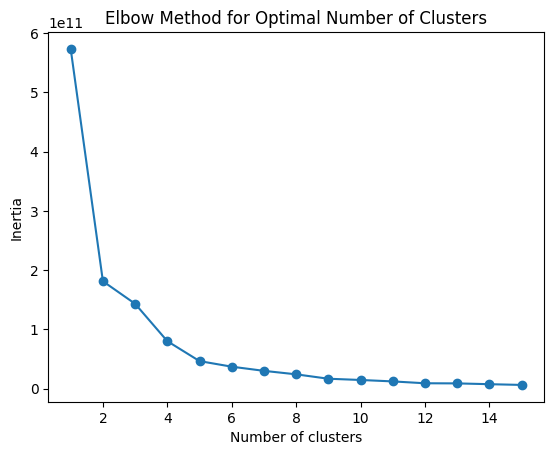

In [10]:
import matplotlib.pyplot as plt

# Define the range of clusters to try
min_clusters = 1
max_clusters = 15

# Initialize list to store inertias
inertias = []

# Loop through each number of clusters
for k in range(min_clusters, max_clusters + 1):
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features_array)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(min_clusters, max_clusters + 1), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


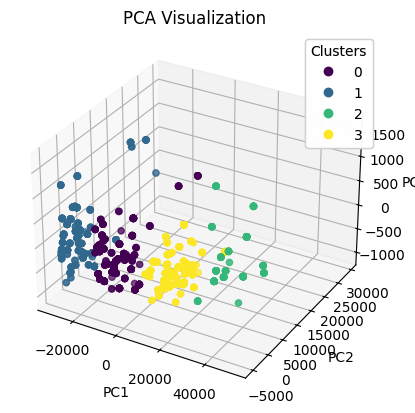

In [30]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import pandas as pd

# Perform PCA
pca = PCA(n_components=5)
features_pca = pca.fit_transform(features_array)

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(features_pca[:, 0], features_pca[:, 1], features_pca[:, 2], c=cluster_labels, cmap='viridis')

# Legend
legend1 = ax.legend(*scatter.legend_elements(), title='Clusters')
ax.add_artist(legend1)

# Set labels and title
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA Visualization')

plt.show()


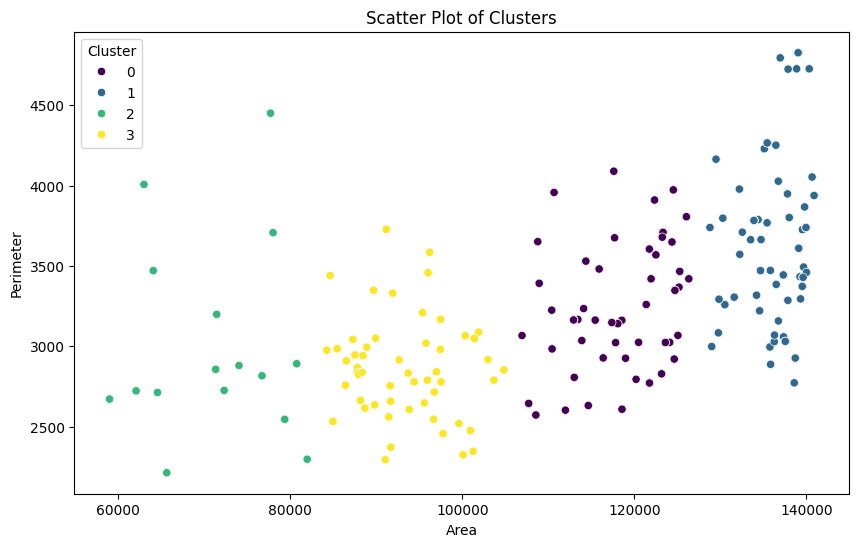

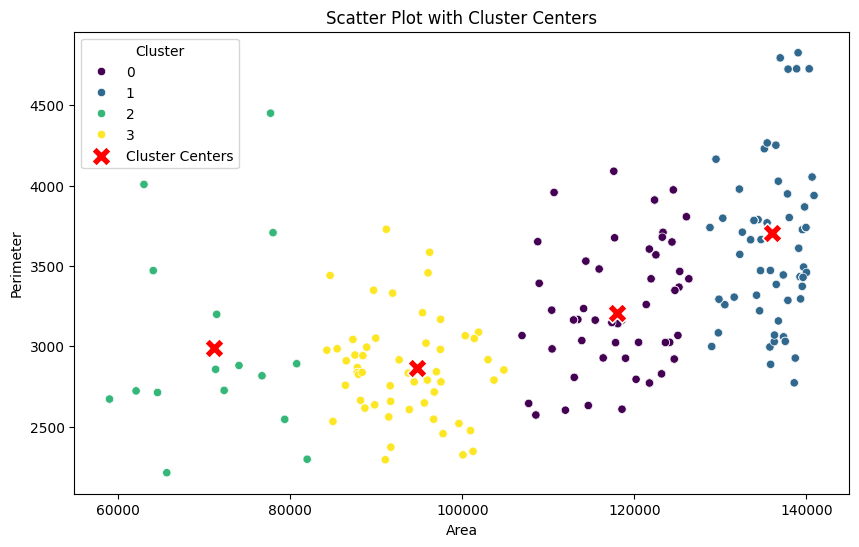

Average Silhouette Score: 0.5479767049661552


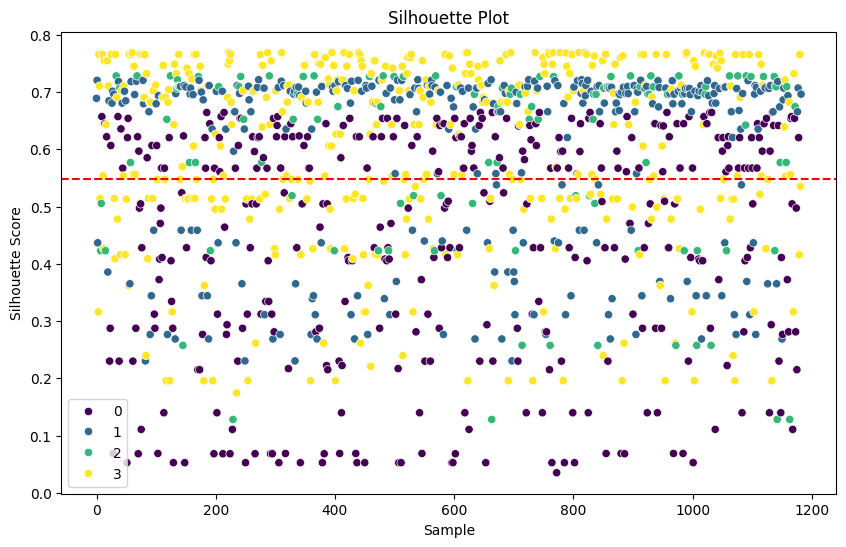

/tmp/ipykernel_49536/3103821977.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=pd.DataFrame(features_array, columns=['Area', 'Perimeter', 'Circularity', 'Diameter', 'Corners']), x=cluster_labels, y='Area', palette='viridis')


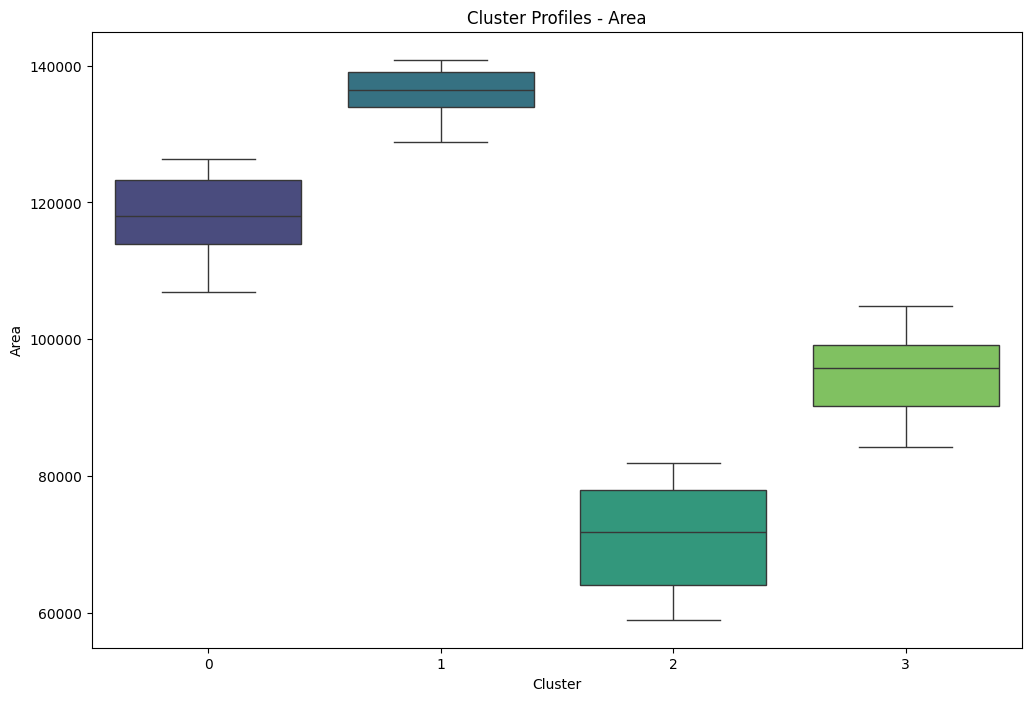

/home/shravani_k/.local/lib/python3.10/site-packages/seaborn/distributions.py:1128: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)


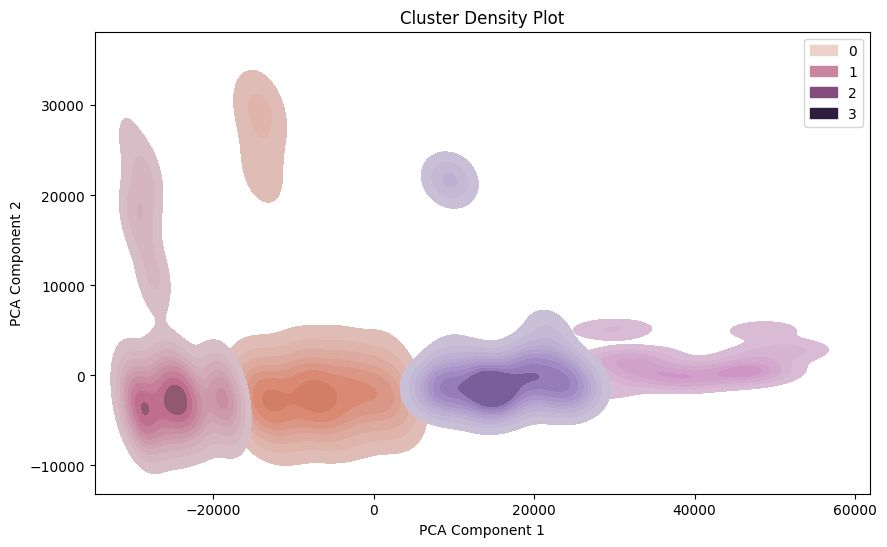

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
import pandas as pd

# Scatter plot with cluster labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x=features_array[:, 0], y=features_array[:, 1], hue=cluster_labels, palette='viridis')
plt.title('Scatter Plot of Clusters')
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.legend(title='Cluster')
plt.show()

# Cluster centers
plt.figure(figsize=(10, 6))
sns.scatterplot(x=features_array[:, 0], y=features_array[:, 1], hue=cluster_labels, palette='viridis')
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color='red', marker='X', s=200, label='Cluster Centers')
plt.title('Scatter Plot with Cluster Centers')
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.legend(title='Cluster')
plt.show()

# Silhouette analysis
silhouette_avg = silhouette_score(features_array, cluster_labels)
print(f"Average Silhouette Score: {silhouette_avg}")

# Compute silhouette scores for each sample
silhouette_values = silhouette_samples(features_array, cluster_labels)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=range(len(features_array)), y=silhouette_values, hue=cluster_labels, palette='viridis')
plt.axhline(y=silhouette_avg, color="red", linestyle="--")
plt.title('Silhouette Plot')
plt.xlabel('Sample')
plt.ylabel('Silhouette Score')
plt.show()

# Cluster profiles
plt.figure(figsize=(12, 8))
sns.boxplot(data=pd.DataFrame(features_array, columns=['Area', 'Perimeter', 'Circularity', 'Diameter', 'Corners']), x=cluster_labels, y='Area', palette='viridis')
plt.title('Cluster Profiles - Area')
plt.xlabel('Cluster')
plt.ylabel('Area')
plt.show()

# Cluster density plots
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features_array)

plt.figure(figsize=(10, 6))
sns.kdeplot(x=reduced_features[:, 0], y=reduced_features[:, 1], hue=cluster_labels, fill=True, cmap='viridis')
plt.title('Cluster Density Plot')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [26]:
import numpy as np
import cv2
import os

# Define the directory containing the images
image_dir = '/home/shravani_k/SEM6/DS-203/Project/E7-images'
# List all files in the directory

# List all files in the directory
image_files = os.listdir(image_dir)

# Function to calculate area, perimeter, compactness, elongation, extent, and tight-fitting bounding box using pixel-based method
def calculate_area_perimeter_compactness_bbox_elongation_extent_corners(image, target_color):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Threshold to create a mask of pixels matching the target color
    mask = np.all(image == target_color, axis=2)
    
    # Find contours from the mask
    contours, _ = cv2.findContours(mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Initialize area, perimeter, and bounding box parameters
    area = 0
    perimeter = 0
    bbox_areas = []
    
    # Iterate through contours
    for contour in contours:
        area += cv2.contourArea(contour)
        perimeter += cv2.arcLength(contour, True)
        
        # Get bounding box for each contour
        x, y, w, h = cv2.boundingRect(contour)
        bbox_areas.append(w * h)  # Calculate area of bounding box
    
    # Calculate compactness
    compactness = (perimeter ** 2) / area
    
    # Get tight-fitting bounding box parameters
    if bbox_areas:
        max_bbox_area_index = bbox_areas.index(max(bbox_areas))
        x, y, w, h = cv2.boundingRect(contours[max_bbox_area_index])
        bbox_area = bbox_areas[max_bbox_area_index]
    else:
        x, y, w, h = 0, 0, 0, 0
        bbox_area = 0
    
    # Calculate elongation
    if w > h:
        elongation = w / h
    else:
        elongation = h / w
    
    # Calculate extent
    extent = area / bbox_area if bbox_area != 0 else 0
    
    # Detect corners using Shi-Tomasi corner detection
    corners = cv2.goodFeaturesToTrack(gray, 100, 0.02, 5)
    corners_count = corners.shape[0] if corners is not None else 0

    return int(area), int(perimeter), round(compactness, 2), (x, y, w, h), bbox_area, round(elongation, 2), round(extent, 2), corners_count

# Loop through each image file
for image_file in image_files:
    # Construct the full path to the image
    image_path = os.path.join(image_dir, image_file)
    
    # Read the image
    img = cv2.imread(image_path)

    # Check if image is loaded properly
    if img is None:
        print(f"Error: Unable to load image {image_file}. Skipping...")
        continue

    # Define the color you want to calculate the area and perimeter for
    target_color = np.array([64, 186, 255])

    # Calculate area, perimeter, compactness, bounding box, elongation, extent, and corners count
    area_count, perimeter_count, compactness, bbox_params, bbox_area, elongation, extent, corners_count = calculate_area_perimeter_compactness_bbox_elongation_extent_corners(img, target_color)
    
    # Unpack bounding box parameters
    x, y, w, h = bbox_params

    # Print the results
    print(f"Image: {image_file}")
    print(f"Area: {area_count}")
    print(f"Perimeter: {perimeter_count}")
    print(f"Compactness: {compactness}")
    print(f"Tight-fitting bounding box:")
    print(f"  - Width: {w}")
    print(f"  - Height: {h}")
    print(f"  - Area: {bbox_area}")
    print(f"Elongation: {elongation}")
    print(f"Extent: {extent}")
    print(f"Number of corners: {corners_count}")
    print()



Image: 0447.jpg
Area: 136486
Perimeter: 3385
Compactness: 83.98
Tight-fitting bounding box:
  - Width: 440
  - Height: 334
  - Area: 146960
Elongation: 1.32
Extent: 0.93
Number of corners: 5

Image: 0848.jpg
Area: 136444
Perimeter: 4251
Compactness: 132.46
Tight-fitting bounding box:
  - Width: 446
  - Height: 332
  - Area: 148072
Elongation: 1.34
Extent: 0.92
Number of corners: 4

Image: 0672.jpg
Area: 137535
Perimeter: 3031
Compactness: 66.82
Tight-fitting bounding box:
  - Width: 440
  - Height: 330
  - Area: 145200
Elongation: 1.33
Extent: 0.95
Number of corners: 7

Image: 0455.jpg
Area: 85439
Perimeter: 2985
Compactness: 104.34
Tight-fitting bounding box:
  - Width: 441
  - Height: 323
  - Area: 142443
Elongation: 1.37
Extent: 0.6
Number of corners: 6

Image: 0281.jpg
Area: 95768
Perimeter: 3020
Compactness: 95.29
Tight-fitting bounding box:
  - Width: 435
  - Height: 327
  - Area: 142245
Elongation: 1.33
Extent: 0.67
Number of corners: 9

Image: 0886.jpg
Area: 97508
Perimeter: 27

KeyboardInterrupt: 

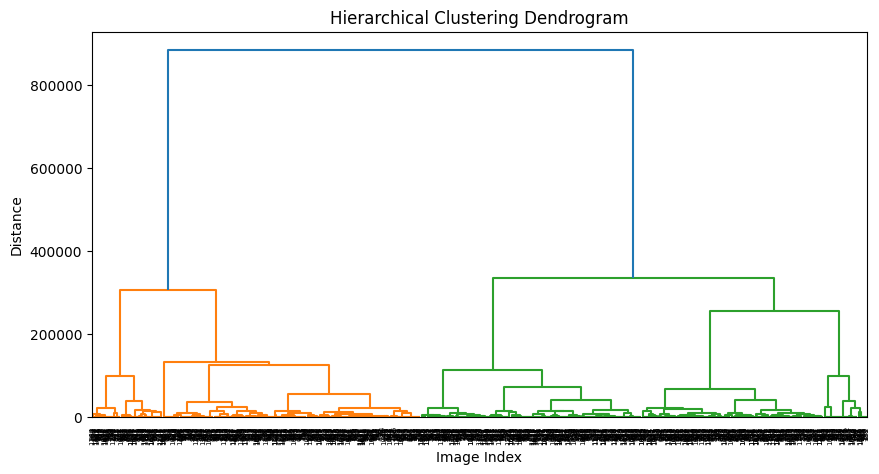

Image: 0447.jpg, Cluster: 4
Image: 0848.jpg, Cluster: 4
Image: 0672.jpg, Cluster: 3
Image: 0455.jpg, Cluster: 0
Image: 0281.jpg, Cluster: 0
Image: 0886.jpg, Cluster: 0
Image: 0830.jpg, Cluster: 0
Image: 0608.jpg, Cluster: 1
Image: 0015.jpg, Cluster: 1
Image: 0734.jpg, Cluster: 2
Image: 0898.jpg, Cluster: 0
Image: 0727.jpg, Cluster: 0
Image: 0925.jpg, Cluster: 0
Image: 0576.jpg, Cluster: 0
Image: 0431.jpg, Cluster: 2
Image: 0484.jpg, Cluster: 1
Image: 1161.jpg, Cluster: 0
Image: 0702.jpg, Cluster: 2
Image: 0212.jpg, Cluster: 0
Image: 0332.jpg, Cluster: 4
Image: 0547.jpg, Cluster: 0
Image: 1024.jpg, Cluster: 4
Image: 0814.jpg, Cluster: 2
Image: 0365.jpg, Cluster: 2
Image: 0867.jpg, Cluster: 2
Image: 0327.jpg, Cluster: 0
Image: 1144.jpg, Cluster: 4
Image: 0580.jpg, Cluster: 4
Image: 0457.jpg, Cluster: 2
Image: 1150.jpg, Cluster: 4
Image: 0824.jpg, Cluster: 0
Image: 0905.jpg, Cluster: 0
Image: 1098.jpg, Cluster: 0
Image: 0343.jpg, Cluster: 1
Image: 0338.jpg, Cluster: 0
Image: 0797.jpg, Clu

In [68]:
import os
import cv2
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Function to calculate area, perimeter, equivalent diameter, and shape descriptors
def calculate_shape_features(image, target_color):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Threshold to create a mask of pixels matching the target color
    mask = np.all(image == target_color, axis=2)
    
    # Find contours from the mask
    contours, _ = cv2.findContours(mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Initialize area, perimeter, and equivalent diameter
    area = 0
    perimeter = 0
    equivalent_diameter = 0
    
    # Iterate through contours
    for contour in contours:
        # Calculate area and perimeter
        area += cv2.contourArea(contour)
        perimeter += cv2.arcLength(contour, True)
        
        # Calculate equivalent diameter
        equivalent_diameter += np.sqrt(4 * area / np.pi)
    
    return int(area), int(perimeter), equivalent_diameter

# Define the directory containing the images
image_dir = '/home/shravani_k/SEM6/DS-203/Project/E7-images'

# List all files in the directory
image_files = os.listdir(image_dir)

# Initialize lists to store features
features_list = []

# Loop through each image file
for image_file in image_files:
    # Construct the full path to the image
    image_path = os.path.join(image_dir, image_file)
    
    # Read the image
    img = cv2.imread(image_path)

    # Check if image is loaded properly
    if img is None:
        print(f"Error: Unable to load image {image_file}. Skipping...")
        continue

    # Define the color you want to calculate the area and perimeter for
    target_color = np.array([64, 186, 255])

    # Calculate shape features
    area_count, perimeter_count, equivalent_diameter = calculate_shape_features(img, target_color)
    
    # Append features to the list
    features_list.append([area_count, perimeter_count, equivalent_diameter])

# Convert the features list to a numpy array
features_array = np.array(features_list)

# Perform hierarchical clustering
agglomerative_cluster = AgglomerativeClustering(n_clusters=6, linkage='ward')
cluster_labels = agglomerative_cluster.fit_predict(features_array)

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage(features_array, 'ward'))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Image Index')
plt.ylabel('Distance')
plt.show()

# Print cluster labels for each image
for i, image_file in enumerate(image_files):
    print(f"Image: {image_file}, Cluster: {cluster_labels[i]}")


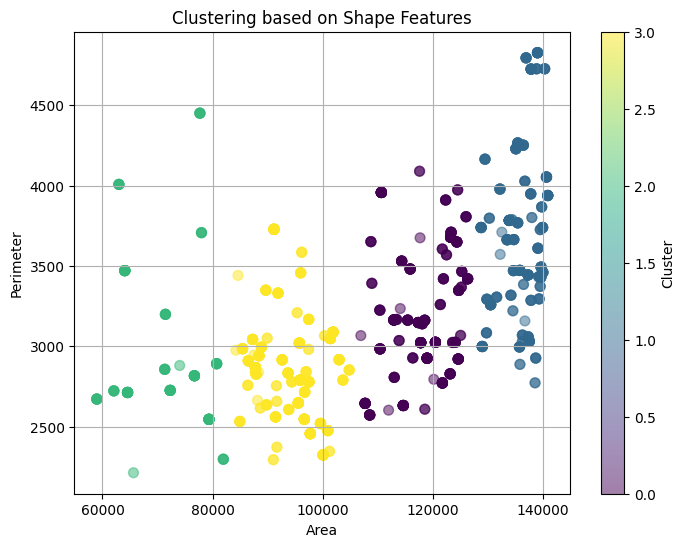

In [32]:
# Scatter plot of clusters
plt.figure(figsize=(8, 6))
plt.scatter(features_array[:, 0], features_array[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.5)
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.title('Clustering based on Shape Features')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


Silhouette Score: 0.5479767049661552


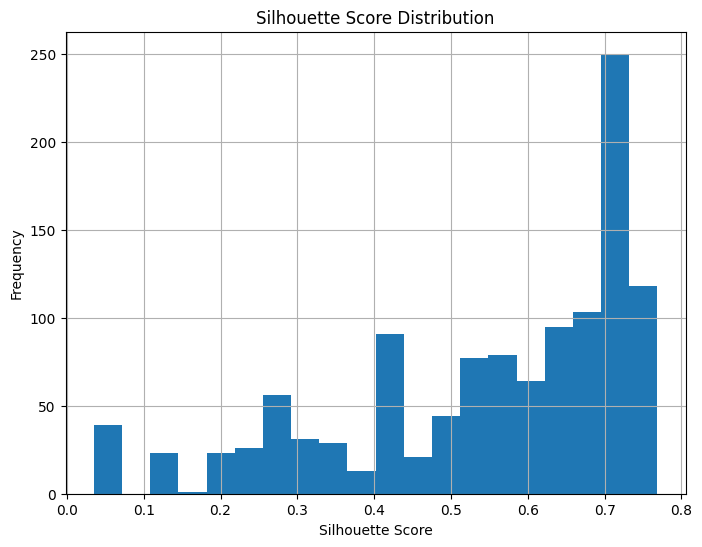

In [33]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(features_array, cluster_labels)

# Print the silhouette score
print(f"Silhouette Score: {silhouette_avg}")

# Plot silhouette scores
silhouette_values = silhouette_samples(features_array, cluster_labels)
plt.figure(figsize=(8, 6))
plt.hist(silhouette_values, bins=20)
plt.xlabel('Silhouette Score')
plt.ylabel('Frequency')
plt.title('Silhouette Score Distribution')
plt.grid(True)
plt.show()


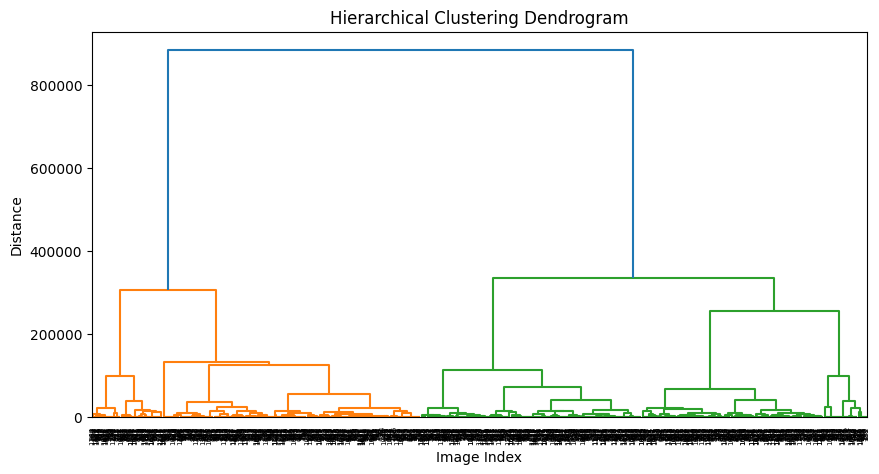

In [69]:
import os
import cv2
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Function to calculate area, perimeter, equivalent diameter, and shape descriptors
def calculate_shape_features(image, target_color):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Threshold to create a mask of pixels matching the target color
    mask = np.all(image == target_color, axis=2)
    
    # Find contours from the mask
    contours, _ = cv2.findContours(mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Initialize area, perimeter, and equivalent diameter
    area = 0
    perimeter = 0
    equivalent_diameter = 0
    
    # Iterate through contours
    for contour in contours:
        # Calculate area and perimeter
        area += cv2.contourArea(contour)
        perimeter += cv2.arcLength(contour, True)
        
        # Calculate equivalent diameter
        equivalent_diameter += np.sqrt(4 * area / np.pi)
    
    return int(area), int(perimeter), equivalent_diameter

# Define the directory containing the images
image_dir = '/home/shravani_k/SEM6/DS-203/Project/E7-images'

# List all files in the directory
image_files = os.listdir(image_dir)

# Initialize lists to store features
features_list = []

# Loop through each image file
for image_file in image_files:
    # Construct the full path to the image
    image_path = os.path.join(image_dir, image_file)
    
    # Read the image
    img = cv2.imread(image_path)

    # Check if image is loaded properly
    if img is None:
        print(f"Error: Unable to load image {image_file}. Skipping...")
        continue

    # Define the color you want to calculate the area and perimeter for
    target_color = np.array([64, 186, 255])

    # Calculate shape features
    area_count, perimeter_count, equivalent_diameter = calculate_shape_features(img, target_color)
    
    # Append features to the list
    features_list.append([area_count, perimeter_count, equivalent_diameter])

# Convert the features list to a numpy array
features_array = np.array(features_list)

# Perform hierarchical clustering
Z = linkage(features_array, 'ward')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Image Index')
plt.ylabel('Distance')
plt.show()


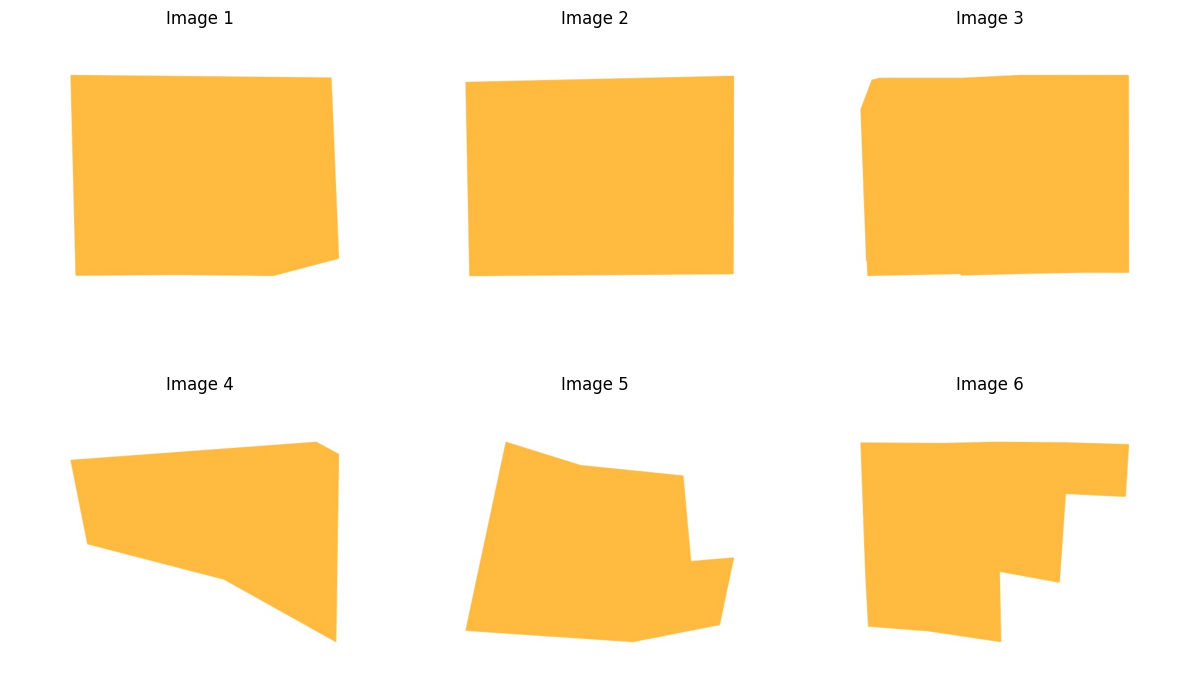

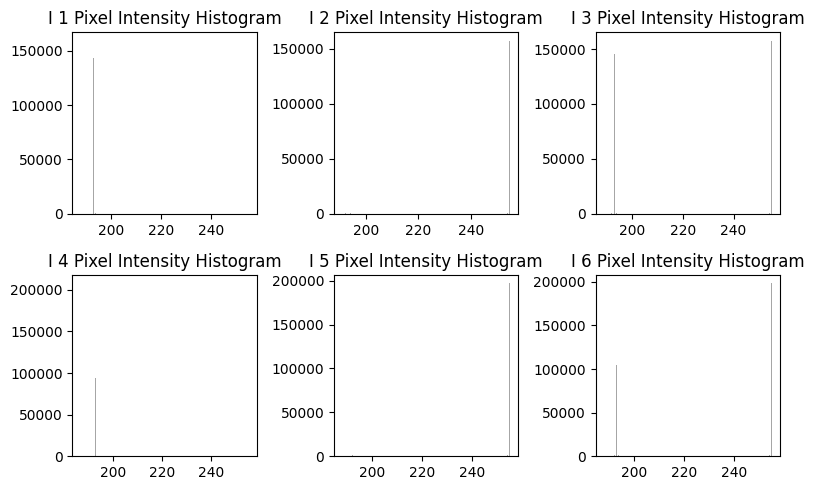

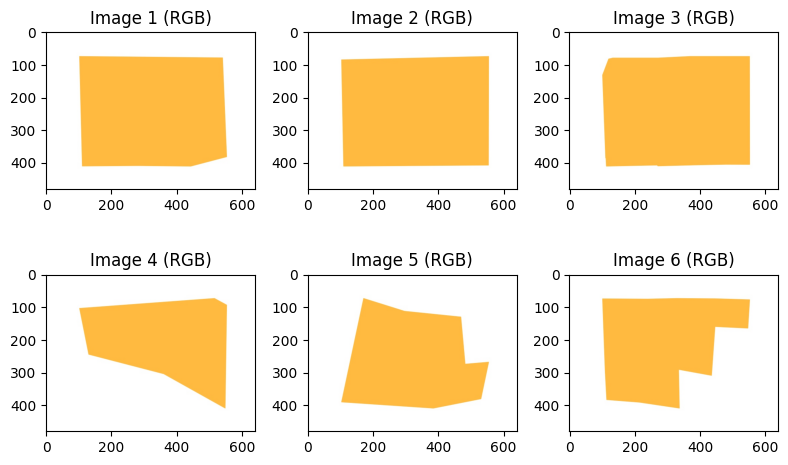

In [38]:
import matplotlib.pyplot as plt
import cv2
import os

# Define the directory containing the images
image_dir = '/home/shravani_k/SEM6/DS-203/Project/E7-images'

# List all files in the directory
image_files = os.listdir(image_dir)

# Function to display sample images
def display_sample_images(image_files, num_samples=6):
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))
    for i, ax in enumerate(axes.flat):
        if i < num_samples:
            # Read the image
            img_path = os.path.join(image_dir, image_files[i])
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            ax.imshow(img)
            ax.set_title(f"Image {i+1}")
            ax.axis('off')
        else:
            ax.axis('off')  # Turn off axis for empty subplots
    plt.tight_layout()
    plt.show()

# Function to plot histograms of pixel intensity distributions
def plot_pixel_intensity_histograms(image_files, num_samples=6):
    fig, axes = plt.subplots(2, 3, figsize=(8, 5))
    for i, ax in enumerate(axes.flat):
        if i < num_samples:
            # Read the image in grayscale
            img_path = os.path.join(image_dir, image_files[i])
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            ax.hist(img.ravel(), bins=256, color='gray', alpha=0.7)
            ax.set_title(f"I {i+1} Pixel Intensity Histogram")
        else:
            ax.axis('off')  # Turn off axis for empty subplots
    plt.tight_layout()
    plt.show()

# Function to visualize color channels (RGB and grayscale)
def visualize_color_channels(image_files, num_samples=6):
    fig, axes = plt.subplots(2, 3, figsize=(8, 5))
    for i, ax in enumerate(axes.flat):
        if i < num_samples:
            # Read the image
            img_path = os.path.join(image_dir, image_files[i])
            img = cv2.imread(img_path)
            # Plot RGB channels
            ax.imshow(img[:, :, [2, 1, 0]])  # Display in RGB order
            ax.set_title(f"Image {i+1} (RGB)")
        else:
            ax.axis('off')  # Turn off axis for empty subplots
    plt.tight_layout()
    plt.show()

# Display sample images
display_sample_images(image_files)

# Plot histograms of pixel intensity distributions
plot_pixel_intensity_histograms(image_files)

# Visualize color channels (RGB and grayscale)
visualize_color_channels(image_files)


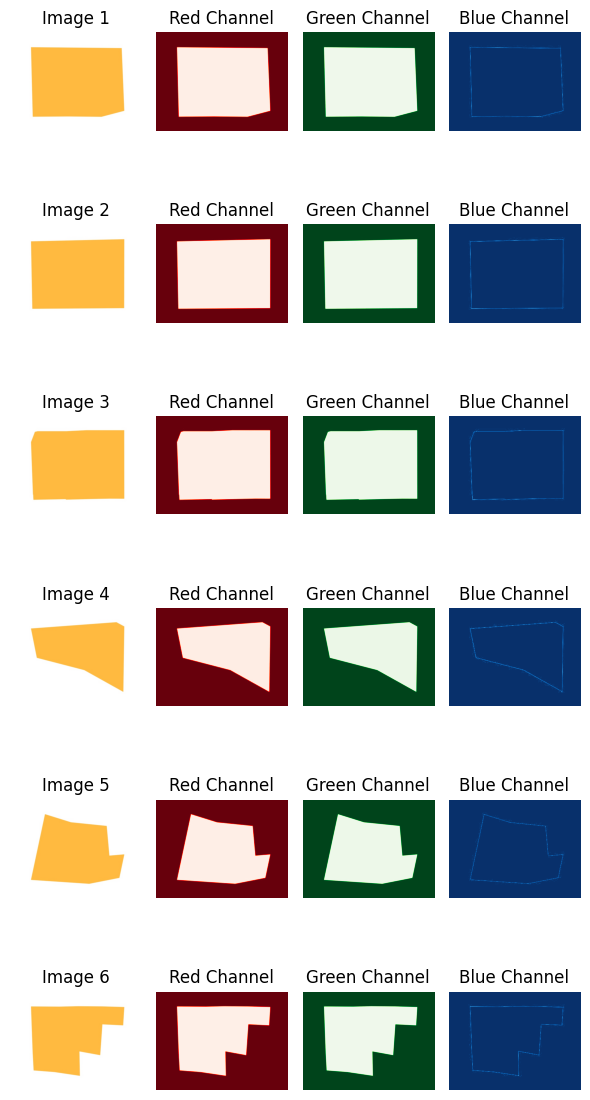

In [41]:
import os
import cv2
import matplotlib.pyplot as plt

# Define the directory containing the images
image_dir = '/home/shravani_k/SEM6/DS-203/Project/E7-images'
# List all files in the directory
image_files = os.listdir(image_dir)

def visualize_color_channels(image_files, num_samples=6):
    fig, axes = plt.subplots(num_samples, 4, figsize=(6, 2*num_samples))
    for i, image_file in enumerate(image_files[:num_samples]):
        # Read the image
        img_path = os.path.join(image_dir, image_file)
        img = cv2.imread(img_path)
        
        # Convert image to grayscale
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        # Split the image into RGB channels
        r, g, b = cv2.split(img)
        
        # Plot original image
        axes[i, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axes[i, 0].set_title(f'Image {i+1}')
        axes[i, 0].axis('off')
        
        # Plot RGB channels
        axes[i, 1].imshow(r, cmap='Reds')
        axes[i, 1].set_title('Red Channel')
        axes[i, 1].axis('off')
        
        axes[i, 2].imshow(g, cmap='Greens')
        axes[i, 2].set_title('Green Channel')
        axes[i, 2].axis('off')
        
        axes[i, 3].imshow(b, cmap='Blues')
        axes[i, 3].set_title('Blue Channel')
        axes[i, 3].axis('off')
        
    plt.tight_layout()
    plt.show()

# Visualize color channels for sample images
visualize_color_channels(image_files)


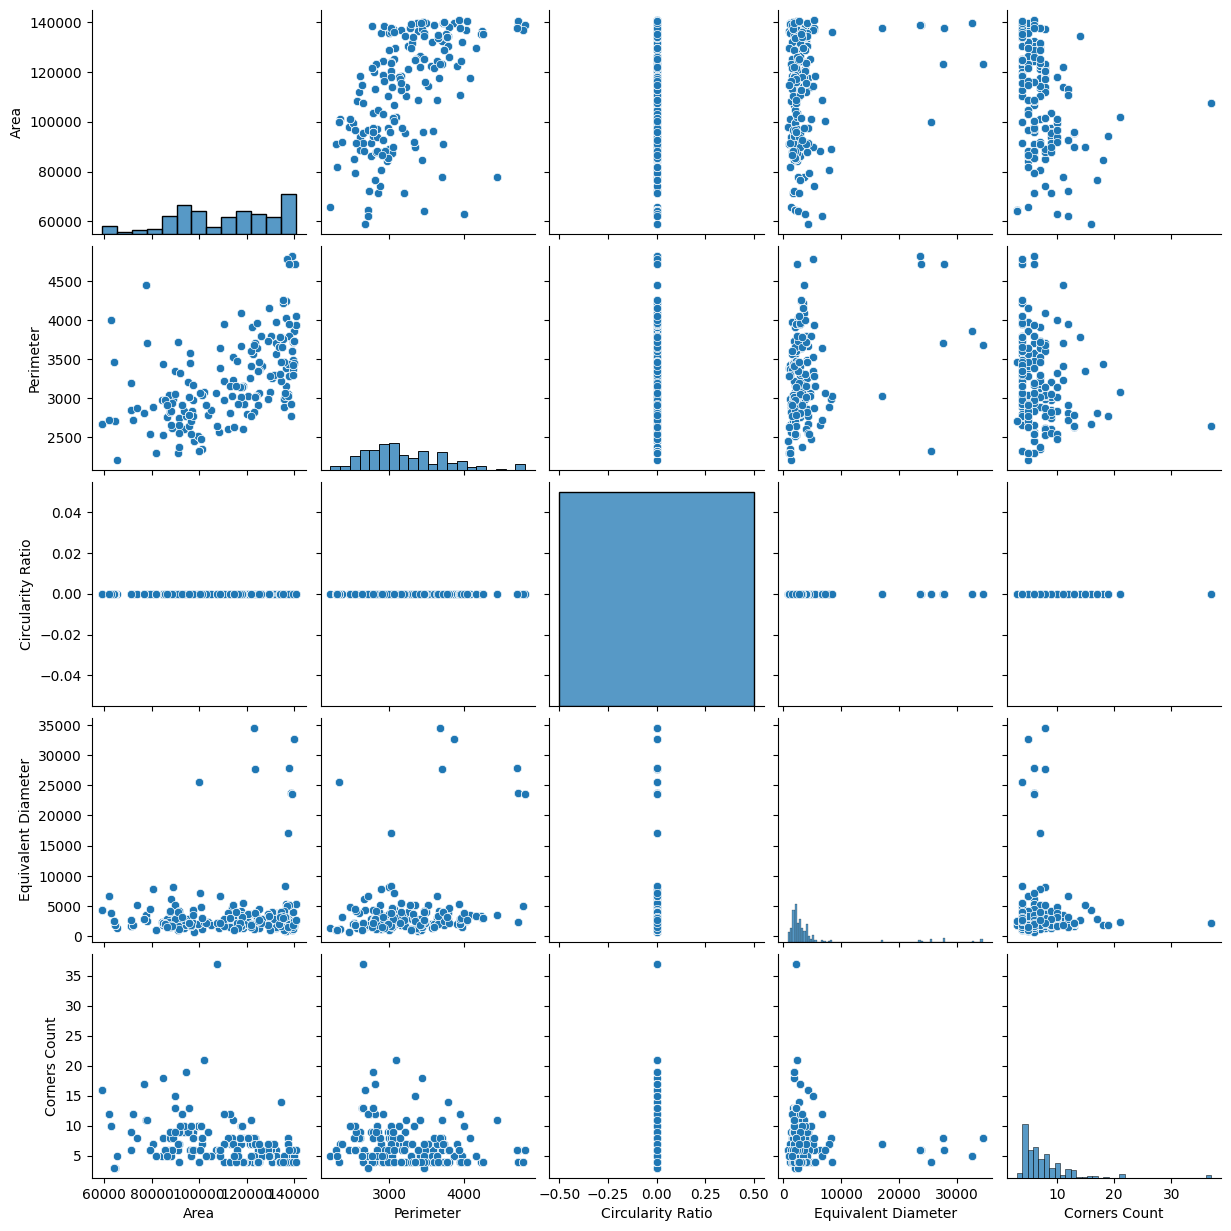

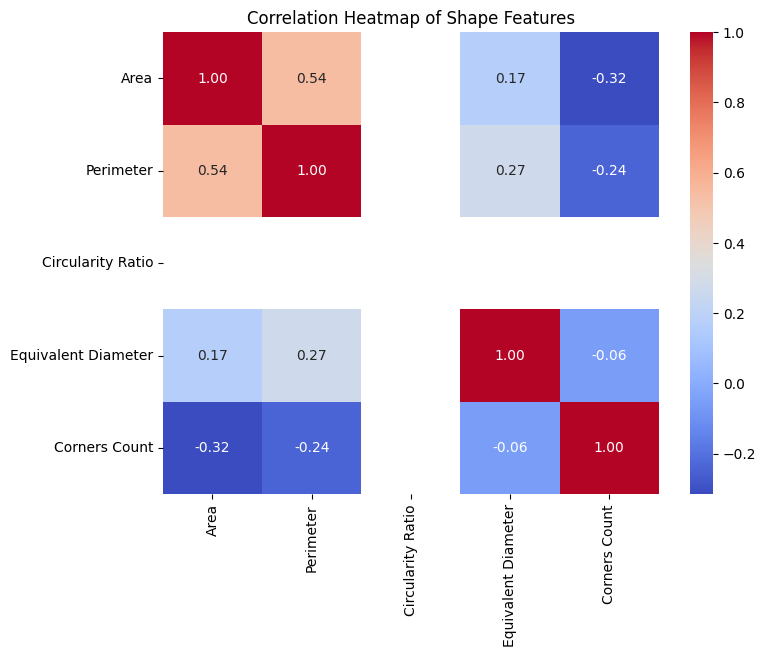

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the function to plot scatter plots or histograms of shape features
def plot_shape_feature_analysis(features_array):
    # Convert features array to DataFrame for easier analysis
    df = pd.DataFrame(features_array, columns=['Area', 'Perimeter', 'Circularity Ratio', 'Equivalent Diameter', 'Corners Count'])

    # Pairplot for scatter plots and histograms
    sns.pairplot(df)
    plt.show()

    # Heatmap for correlation analysis
    plt.figure(figsize=(8, 6))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap of Shape Features')
    plt.show()

# Call the function with features array as input
plot_shape_feature_analysis(features_array)


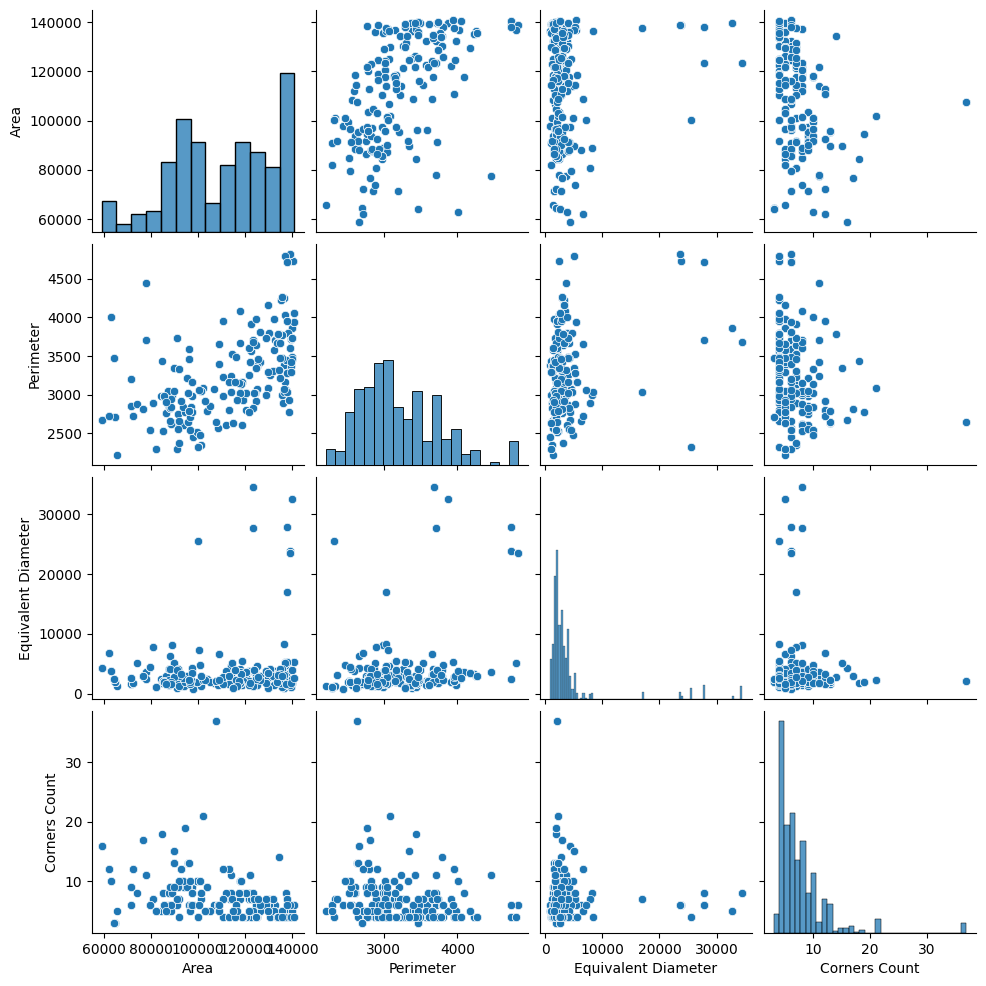

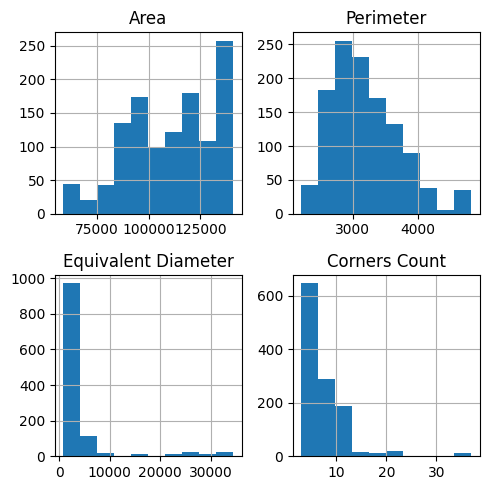

In [56]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Define the directory containing the images
image_dir = '/home/shravani_k/SEM6/DS-203/Project/E7-images'
# List all files in the directory
image_files = os.listdir(image_dir)

# Function to calculate area, perimeter, circularity ratio, equivalent diameter, and shape descriptors
def calculate_shape_features(image, target_color):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Threshold to create a mask of pixels matching the target color
    mask = np.all(image == target_color, axis=2)
    
    # Find contours from the mask
    contours, _ = cv2.findContours(mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Initialize area, perimeter, circularity ratio, and equivalent diameter
    area = 0
    perimeter = 0
    circularity_ratio = 0
    equivalent_diameter = 0
    shape_descriptors = []
    
    # Iterate through contours
    for contour in contours:
        # Calculate area and perimeter
        area += cv2.contourArea(contour)
        perimeter += cv2.arcLength(contour, True)
        
        # Calculate circularity ratio
        #circularity_ratio += (4 * np.pi * area) / (perimeter ** 2)
        
        # Calculate equivalent diameter
        equivalent_diameter += np.sqrt(4 * area / np.pi)
        
        # Calculate shape descriptors (Hu moments)
        moments = cv2.moments(contour)
        hu_moments = cv2.HuMoments(moments).flatten()
        shape_descriptors.append(hu_moments)
    
    return int(area), int(perimeter),  equivalent_diameter, shape_descriptors

# Initialize lists to store features
area_list = []
perimeter_list = []
circularity_list = []
equivalent_diameter_list = []
corners_count_list = []

# Loop through each image file
for image_file in image_files:
    # Construct the full path to the image
    image_path = os.path.join(image_dir, image_file)
    
    # Read the image
    img = cv2.imread(image_path)

    # Check if image is loaded properly
    if img is None:
        print(f"Error: Unable to load image {image_file}. Skipping...")
        continue

    # Define the color you want to calculate the area and perimeter for
    target_color = np.array([64, 186, 255])

    # Calculate shape features
    area_count, perimeter_count,  equivalent_diameter, _ = calculate_shape_features(img, target_color)
    
    # Detect corners using Shi-Tomasi corner detection
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    corners = cv2.goodFeaturesToTrack(gray, 100, 0.02, 5)
    corners_count = corners.shape[0] if corners is not None else 0
    
    # Append features to the lists
    area_list.append(area_count)
    perimeter_list.append(perimeter_count)
    #circularity_list.append(circularity_ratio)
    equivalent_diameter_list.append(equivalent_diameter)
    corners_count_list.append(corners_count)

# Convert the lists to a pandas DataFrame
df = pd.DataFrame({
    'Area': area_list,
    'Perimeter': perimeter_list,
    #'Circularity Ratio': circularity_list,
    'Equivalent Diameter': equivalent_diameter_list,
    'Corners Count': corners_count_list
})

# Plot scatter plots
sns.pairplot(df)
plt.show()

# Plot histograms
df.hist(figsize=(5, 5))
plt.tight_layout()
plt.show()


In [15]:
import cv2
import numpy as np
import os

def calculate_area_and_perimeter(directory, target_color):
    area_perimeter_data = []
    
    # Define a function to check if a pixel is within the image boundaries
    def within_bounds(image, x, y):
        return 0 <= x < image.shape[1] and 0 <= y < image.shape[0]

    # Iterate over each image file in the directory
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            # Read the image
            image_path = os.path.join(directory, filename)
            image = cv2.imread(image_path)
            
            # Initialize area count and perimeter count for this image
            area_count = 0
            perimeter_count = 0
            
            # Iterate through each pixel
            for i in range(image.shape[0]):
                for j in range(image.shape[1]):
                    # Check if the pixel matches the target color
                    if np.array_equal(image[i, j], target_color):
                        # Increment area count if the pixel matches
                        area_count += 1
                        
                        # Check neighboring pixels to compute perimeter
                        for dx, dy in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
                            nx, ny = i + dx, j + dy
                            if not within_bounds(image, nx, ny) or not np.array_equal(image[nx, ny], target_color):
                                # Increment perimeter count if the neighboring pixel is not of the specified color
                                perimeter_count += 1
            
            # Store the area and perimeter count for this image
            area_perimeter_data.append({
                'filename': filename,
                'area': area_count,
                'perimeter': perimeter_count
            })
    
    return area_perimeter_data

# Define the directory containing the images
directory = '/home/shravani_k/SEM6/DS-203/Project/E7-images'
# Define the color you want to calculate the area and perimeter for
target_color = np.array([64, 186, 255])

# Calculate area and perimeter for each image in the directory
area_perimeter_data = calculate_area_and_perimeter(directory, target_color)

# Print the results
for data in area_perimeter_data:
    print("Image: {}".format(data['filename']))
    print("Area of region with color {}: {}".format(target_color, data['area']))
    print("Perimeter of region with color {}: {}".format(target_color, data['perimeter']))
    print()


KeyboardInterrupt: 

In [16]:
import cv2
import numpy as np
import os

def calculate_area_and_perimeter(directory, target_color):
    area_perimeter_data = []
    
    # Iterate over each image file in the directory
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            # Read the image
            image_path = os.path.join(directory, filename)
            image = cv2.imread(image_path)
            
            # Convert image to grayscale
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            
            # Threshold the image to find the colored regions
            _, thresh = cv2.threshold(gray_image, target_color[0], 255, cv2.THRESH_BINARY)
            
            # Find contours of the colored regions
            contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            
            # Initialize area and perimeter for this image
            area = 0
            perimeter = 0
            
            # Iterate over contours and calculate area and perimeter
            for contour in contours:
                area += cv2.contourArea(contour)
                perimeter += cv2.arcLength(contour, True)
            
            # Store the area and perimeter for this image
            area_perimeter_data.append({
                'filename': filename,
                'area': area,
                'perimeter': perimeter
            })
    
    return area_perimeter_data

# Define the directory containing the images
directory = '/home/shravani_k/SEM6/DS-203/Project/E7-images'
# Define the color you want to calculate the area and perimeter for
target_color = np.array([64, 186, 255])

# Calculate area and perimeter for each image in the directory
area_perimeter_data = calculate_area_and_perimeter(directory, target_color)

# Print the results
for data in area_perimeter_data:
    print("Image: {}".format(data['filename']))
    print("Area of region with color {}: {}".format(target_color, data['area']))
    print("Perimeter of region with color {}: {}".format(target_color, data['perimeter']))
    print()


Image: 0447.jpg
Area of region with color [ 64 186 255]: 306081.0
Perimeter of region with color [ 64 186 255]: 2236.0

Image: 0848.jpg
Area of region with color [ 64 186 255]: 306081.0
Perimeter of region with color [ 64 186 255]: 2236.0

Image: 0672.jpg
Area of region with color [ 64 186 255]: 306081.0
Perimeter of region with color [ 64 186 255]: 2236.0

Image: 0455.jpg
Area of region with color [ 64 186 255]: 306081.0
Perimeter of region with color [ 64 186 255]: 2236.0

Image: 0281.jpg
Area of region with color [ 64 186 255]: 306081.0
Perimeter of region with color [ 64 186 255]: 2236.0

Image: 0886.jpg
Area of region with color [ 64 186 255]: 306081.0
Perimeter of region with color [ 64 186 255]: 2236.0

Image: 0830.jpg
Area of region with color [ 64 186 255]: 306081.0
Perimeter of region with color [ 64 186 255]: 2236.0

Image: 0608.jpg
Area of region with color [ 64 186 255]: 306081.0
Perimeter of region with color [ 64 186 255]: 2236.0

Image: 0015.jpg
Area of region with colo

In [18]:
import cv2
import numpy as np
import os

def calculate_area_and_perimeter(directory, target_color):
    area_perimeter_data = []
    
    # Iterate over each image file in the directory
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            # Read the image
            image_path = os.path.join(directory, filename)
            image = cv2.imread(image_path)
            
            # Convert image to grayscale
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            
            # Threshold the image to find the colored regions
            _, thresh = cv2.threshold(gray_image, target_color[0], 255, cv2.THRESH_BINARY)
            
            # Find pixel coordinates of target color
            coordinates = np.argwhere(thresh == 255)
            
            # Calculate area and perimeter
            area = len(coordinates)
            perimeter = 0
            for coord in coordinates:
                x, y = coord
                neighbors = [(x+1, y), (x-1, y), (x, y+1), (x, y-1)]
                for neighbor in neighbors:
                    if neighbor in coordinates:
                        perimeter += 1
            
            # Store the area and perimeter for this image
            area_perimeter_data.append({
                'filename': filename,
                'area': area,
                'perimeter': perimeter
            })
    
    return area_perimeter_data

# Define the directory containing the images
directory = '/home/shravani_k/SEM6/DS-203/Project/E7-images'
# Define the color you want to calculate the area and perimeter for
target_color = np.array([64, 186, 255])

# Calculate area and perimeter for each image in the directory
area_perimeter_data = calculate_area_and_perimeter(directory, target_color)

# Print the results
for data in area_perimeter_data:
    print("Image: {}".format(data['filename']))
    print("Area of region with color {}: {}".format(target_color, data['area']))
    print("Perimeter of region with color {}: {}".format(target_color, data['perimeter']))
    print()


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/shravani_k/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3550, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_138998/2283944081.py", line 49, in <module>
    area_perimeter_data = calculate_area_and_perimeter(directory, target_color)
  File "/tmp/ipykernel_138998/2283944081.py", line -1, in calculate_area_and_perimeter
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/shravani_k/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2144, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/home/shravani_k/.local/lib/python3.10/site-packages/IPython/core/ultratb.py", line 1435, in structured_traceback
    return FormattedTB.structured_traceback(
  File "/home/shravani_k/.local/lib/python3.10/site-packages/IPython/core/ultratb.py", line 1